In [486]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [487]:
#data collection
df=pd.read_csv("marketing_campaign.csv")

In [488]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [489]:
#to check the number of observations(rows) and features(columns) in the dataset
df.shape

(2240, 29)

In [490]:
# It helps to understand the data type and information about data, 
# including the number of records in each column, data having null or not null, 
# Data type, the memory usage of the dataset
#(ex- If column having Categorical variables or object further change into numerical format)
#Here we have 3 categorical variables and 26 numerical variables
#Only Income variable has missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [491]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [492]:
#we can identify the continuous and categorical columns in the data
#here no duplicate value primary_id id ID column)
#if distinct count of column is one then we remove that column
nuique_value=pd.DataFrame(df.nunique())
nuique_value

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [493]:
# are there  any duplicate columns?
df.duplicated().sum() # to check duplcate
df1=df


### Feature engineering/Data cleaning

In [494]:
from datetime import datetime, date
today=date.today()
df["Year_Birth"]=today.year - df["Year_Birth"]

# convert the date of enrolment to datetime
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

# creating features from date of enrolment
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_customer'] = df['Dt_Customer'].apply(lambda x: x.day)

df=df.drop("Dt_Customer",axis=1)

#total amount purchase
df["Total Spend"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]
df=df.drop(["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"],axis=1)

#total number of purchases
df["Total no of purchase"]=df["NumDealsPurchases"]+df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]+df["NumWebVisitsMonth"]
df=df.drop(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"],axis=1)

df=df.drop("ID",axis=1) # remove column which is not used for prediction

#### Exploratory Analysis

#### identifying relationships (between Y & numerical independent variables by comparing means)

In [495]:
# Distribution of Y
print(df.Response.value_counts())
print(df.Response.value_counts()/df.Response.count())

0    1906
1     334
Name: Response, dtype: int64
0    0.850893
1    0.149107
Name: Response, dtype: float64


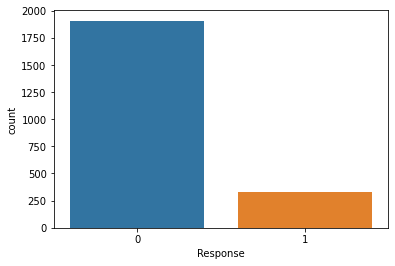

In [496]:
sns.countplot(x="Response", data=df)
plt.show()
#imbalance dataset hence we have care about accuracy metrices.

In [497]:
df.groupby('Response').mean()

,Year_Birth,Income,Kidhome,Teenhome,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Year_Customer,Month_customer,Day_customer,Total Spend,Total no of purchase
Response,,,,,,,,,,,,,,,,,,
0,54.301154,50839.132767,0.462225,0.541448,51.514690,0.045121,0.055089,0.037251,0.034103,0.005247,0.009444,3.0,11.0,2013.077125,6.419727,15.670514,538.929171,19.684155
1,53.583832,60209.675676,0.341317,0.305389,35.383234,0.230539,0.185629,0.275449,0.236527,0.059880,0.008982,3.0,11.0,2012.748503,6.739521,15.455090,987.392216,23.000000


- Higher income participate in compaign
- lower Recency participate in compaign

#### Categorical visualization with output variable y

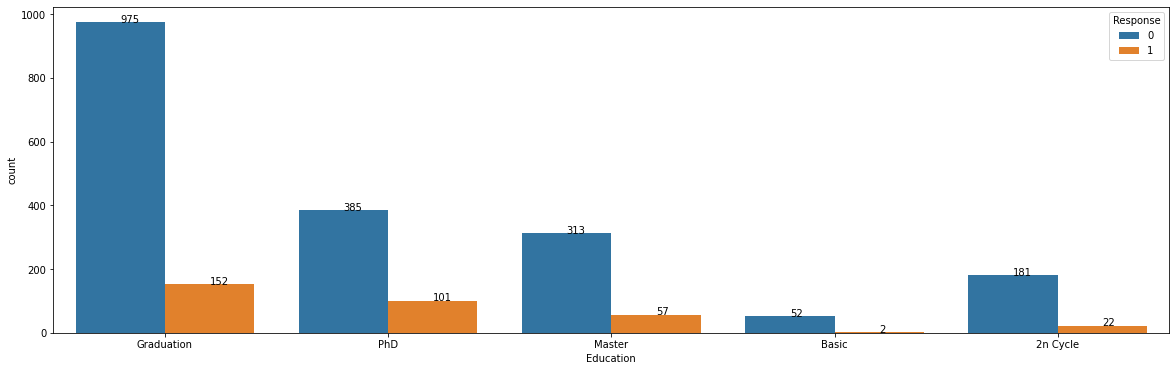

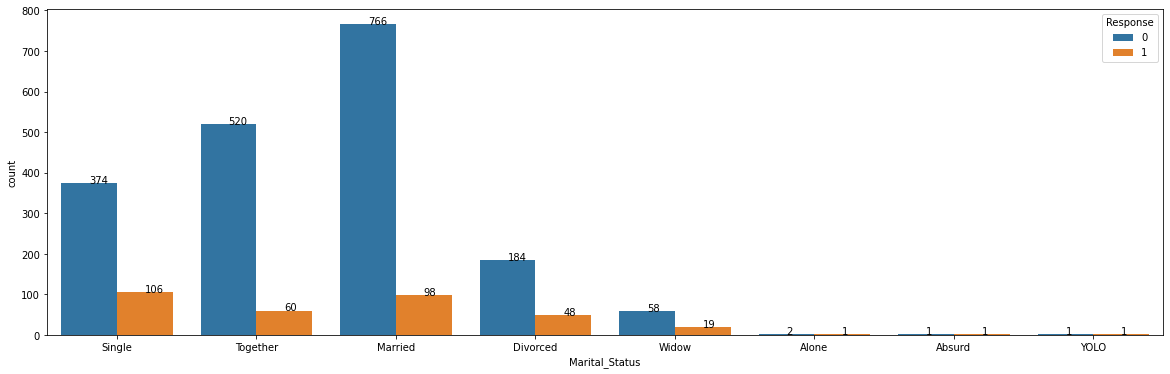

In [498]:
columnlist=df.select_dtypes(include=['object']).columns.tolist()
for i in columnlist:
    plt.figure(figsize = (20, 6))
    ax=sns.countplot(x=i,hue="Response",data=df)
    for p in ax.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
        s = height) # data label, formatted to ignore decimals
        
    plt.show()

- Alone, absurd, YOLO only one value then we can delete

In [499]:
df=df[df["Marital_Status"]!="Alone"]
df=df[df["Marital_Status"]!="Absurd"]
df=df[df["Marital_Status"]!="YOLO"]

Statistical Data Analysis

In [500]:
#year_birth start from 1893 to 1996 and contain all range of customer
#income have some null value and mean of income 52k and max 666k its huge differance it contain outlier
#Low standard deviation means data are clustered around the mean, 
# and high standard deviation indicates data are more spread out(most no of income spreadout near 25k)
# min and max value is same for few variables, lets check it has only one value
# lets remove these two variables
# Recency: every two month customer buys product
#data distribution
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_customer,Day_customer,Total Spend,Total no of purchase
count,2233.000000,2209.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.0,2233.0,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,54.209136,52243.977818,0.444245,0.506046,49.172414,0.072548,0.074787,0.072548,0.064039,0.013435,0.009404,3.0,11.0,0.148231,2013.028213,6.467085,15.639946,605.904613,20.172414
std,11.979248,25198.475858,0.538528,0.544675,28.962114,0.259451,0.263107,0.259451,0.244878,0.115153,0.096541,0.0,0.0,0.355408,0.683662,3.485623,8.801640,602.697511,7.295068
min,27.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000,1.000000,1.000000,5.000000,0.000000
25%,46.000000,35246.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,3.000000,8.000000,68.000000,14.000000
50%,53.000000,51390.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,6.000000,16.000000,396.000000,19.000000
75%,64.000000,68627.000000,1.000000,1.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000,10.000000,23.000000,1045.000000,25.000000
max,130.000000,666666.000000,2.000000,2.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000,12.000000,31.000000,2525.000000,46.000000


- the difference b/w 75% and max is very high, this is sign of outlier
- Z_CostContact,	Z_Revenue have only one value so drop it.

In [501]:
# lets check if any variable has only one value
for col in df.columns:
    if len(df[col].value_counts())==1:
        print(col)

# lets remove these two variables
df = df.drop(['Z_CostContact','Z_Revenue'],axis=1)

Z_CostContact
Z_Revenue


Null and Missing value handling

In [502]:
df.isnull().sum()

Year_Birth               0
Education                0
Marital_Status           0
Income                  24
Kidhome                  0
Teenhome                 0
Recency                  0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Response                 0
Year_Customer            0
Month_customer           0
Day_customer             0
Total Spend              0
Total no of purchase     0
dtype: int64

In [503]:
df["Income"].fillna(df["Income"].mean(),inplace=True)

Univariant analysis

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In [504]:
# Univariate analysis is used to analyze 
# and summarize the characteristics of a single variable in
#  a dataset. It helps to understand the distribution of 
# the variable, identify any outliers, and detect any 
# underlying patterns or relationships. By focusing on 
# one variable at a time, univariate analysis makes 
# it easier to visualize and understand the data and 
# draw insights that might not be immediately apparent 
# from a more complex multivariate analysis

Removing outlier/univariant analysis

Year_Birth
Skew : 0.35


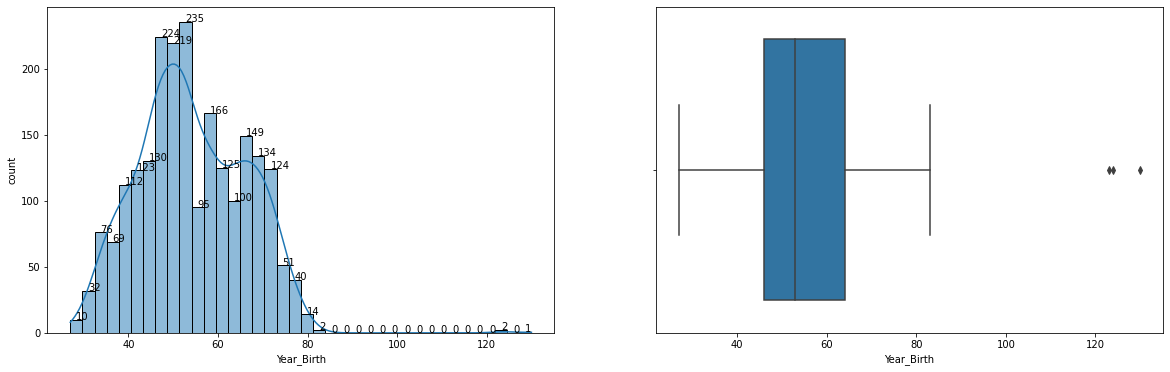

Income
Skew : 6.8


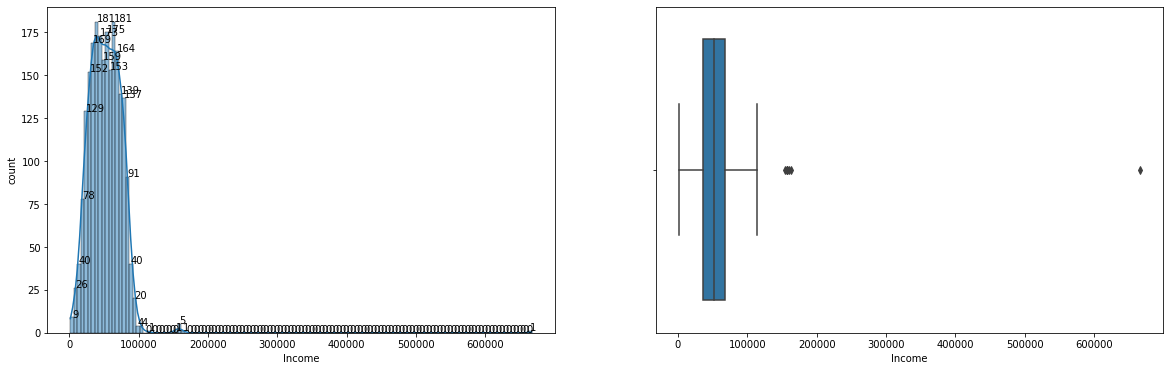

Kidhome
Skew : 0.64


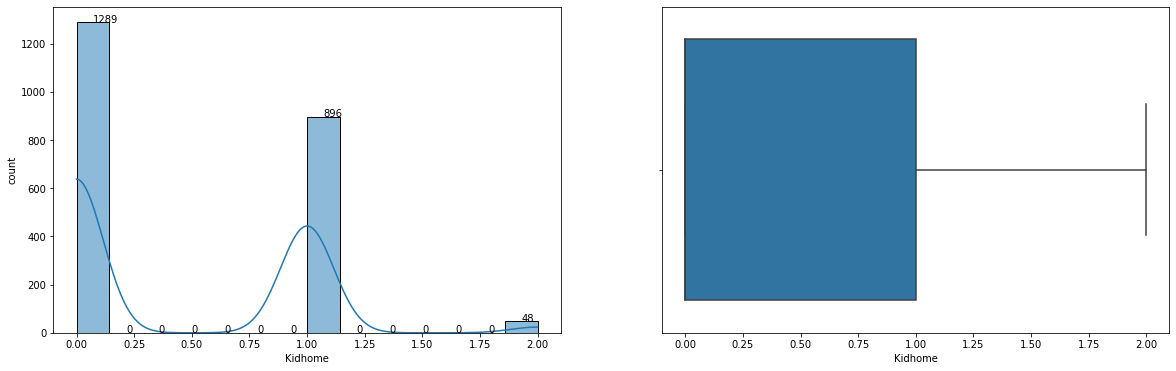

Teenhome
Skew : 0.41


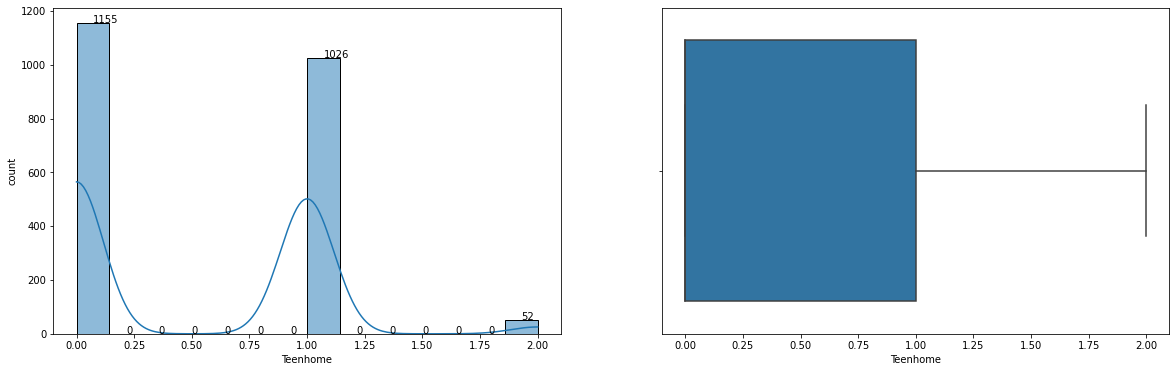

Recency
Skew : -0.0


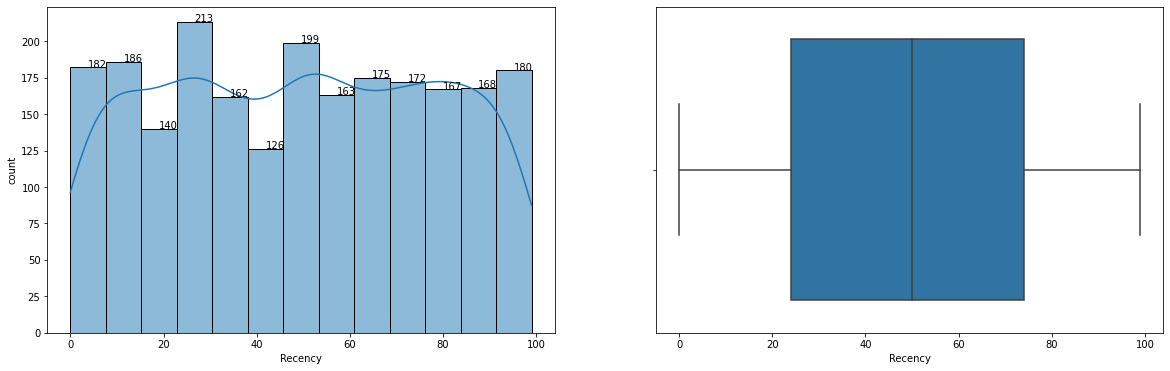

AcceptedCmp3
Skew : 3.3


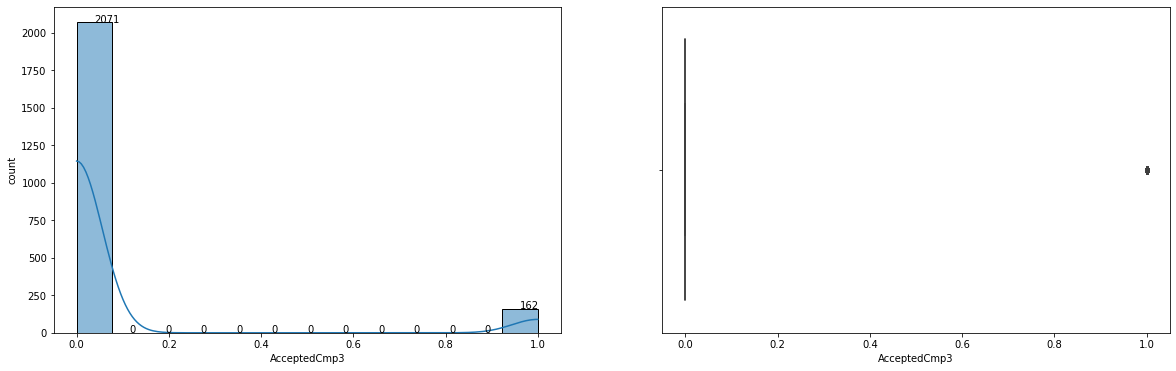

AcceptedCmp4
Skew : 3.24


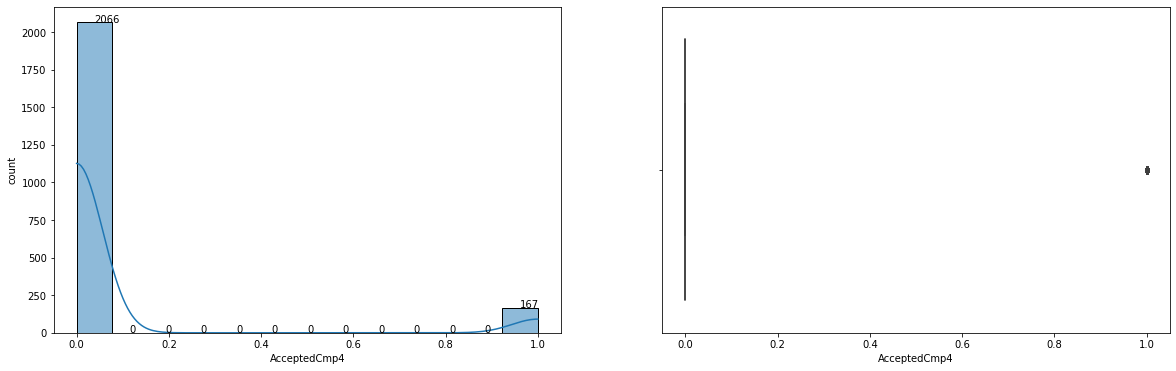

AcceptedCmp5
Skew : 3.3


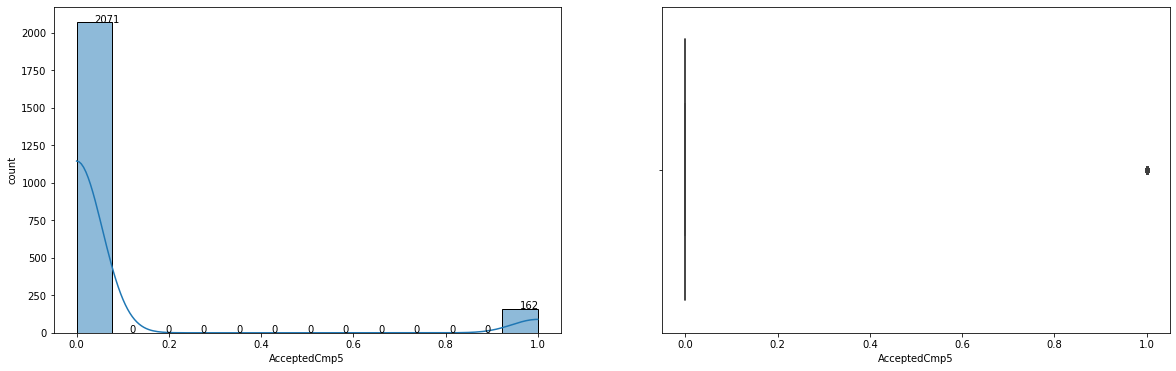

AcceptedCmp1
Skew : 3.56


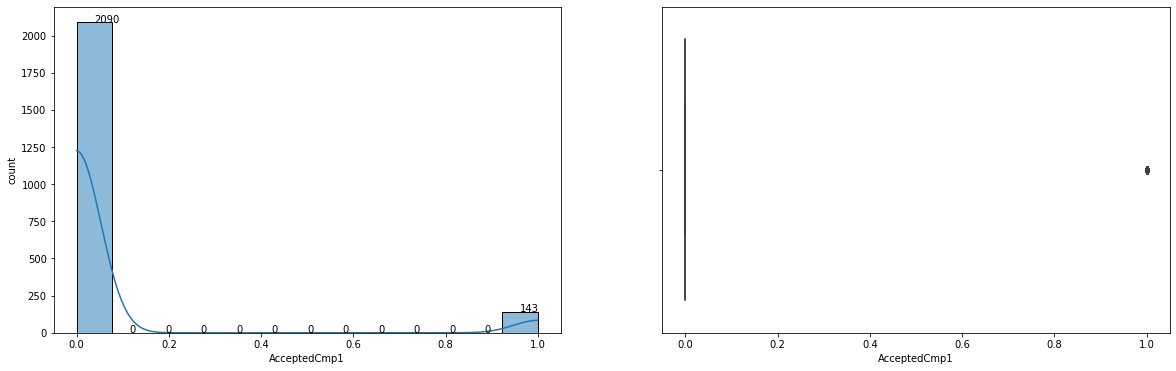

AcceptedCmp2
Skew : 8.46


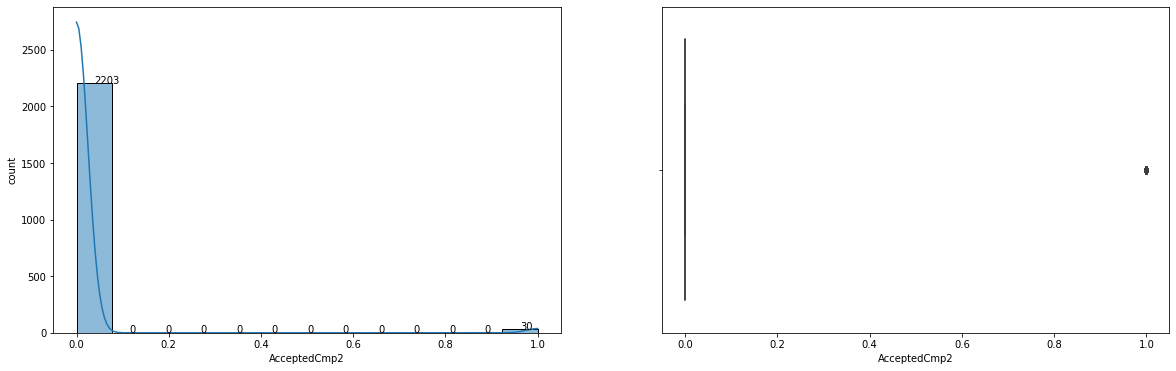

Complain
Skew : 10.17


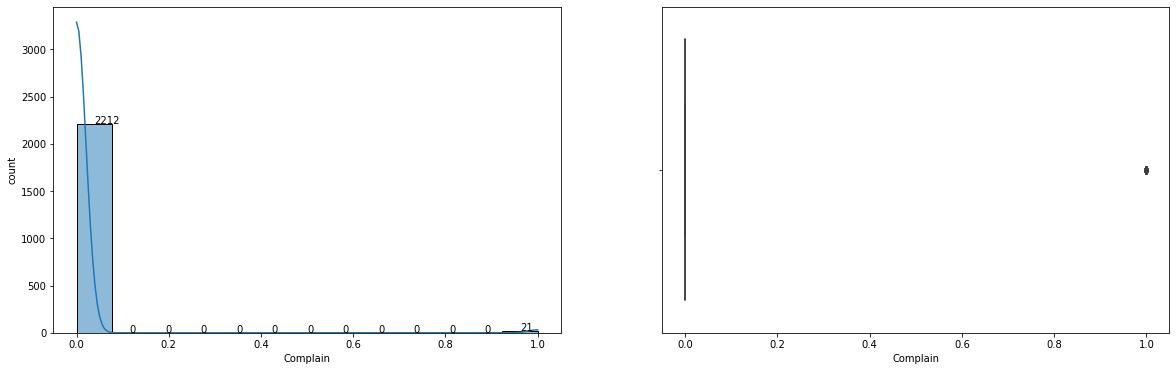

Response
Skew : 1.98


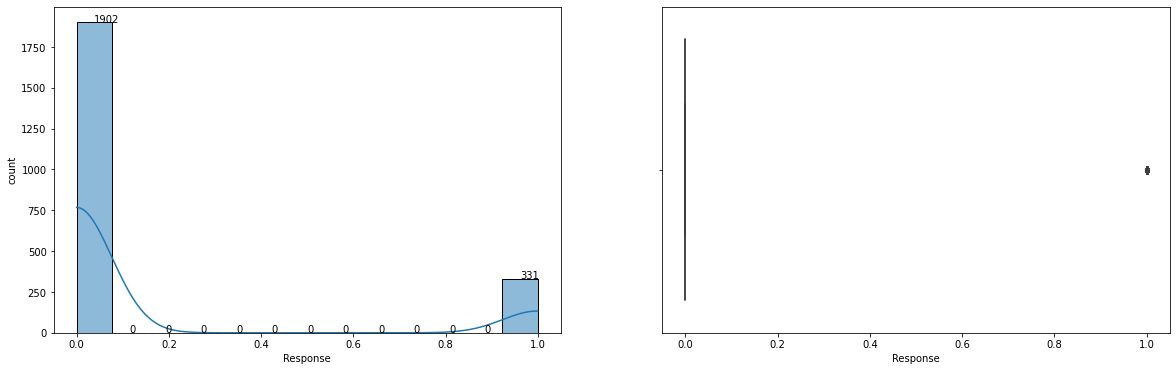

Year_Customer
Skew : -0.04


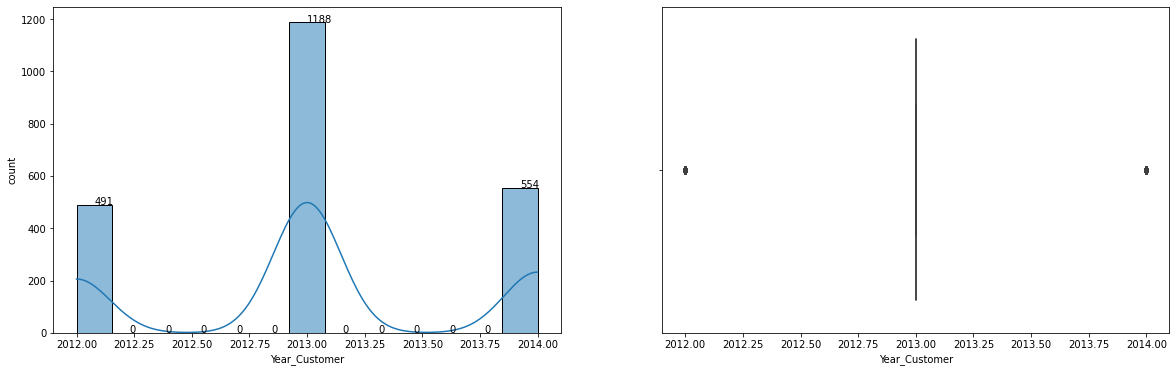

Month_customer
Skew : 0.0


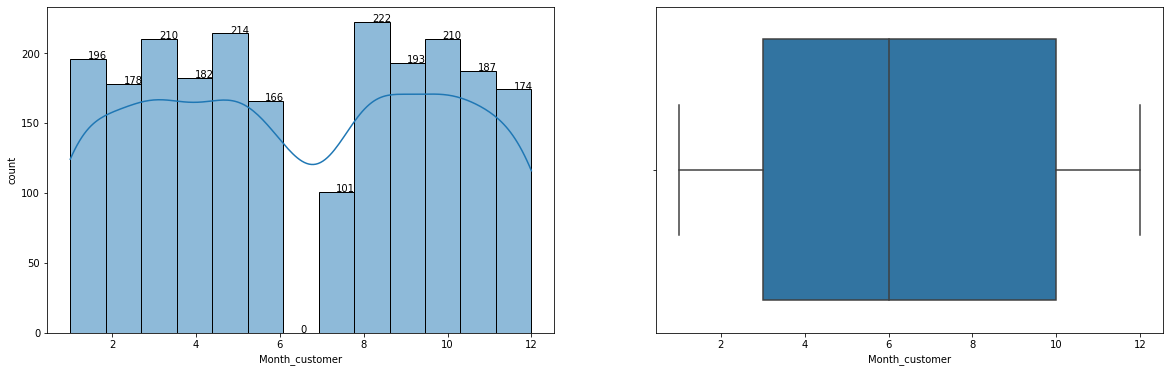

Day_customer
Skew : 0.03


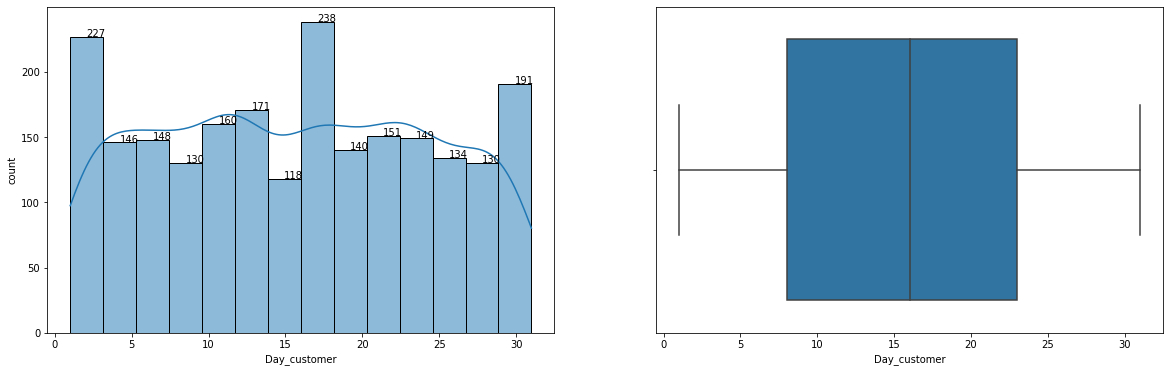

Total Spend
Skew : 0.86


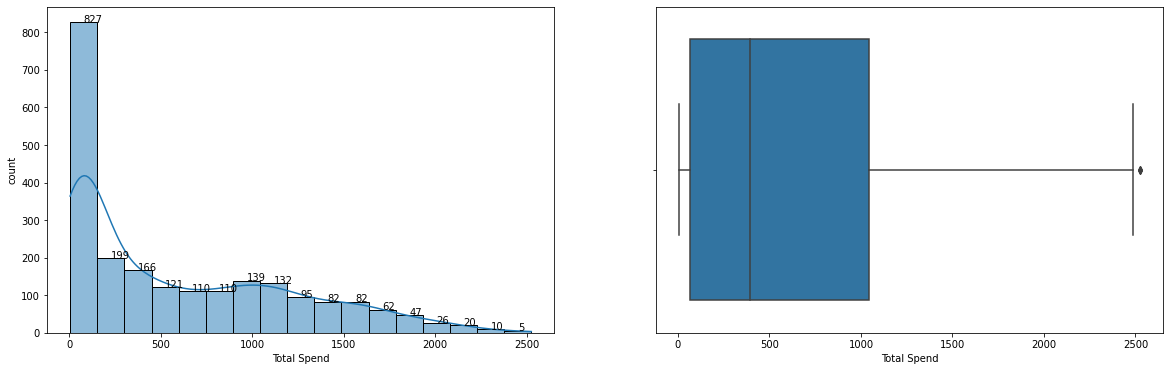

Total no of purchase
Skew : 0.42


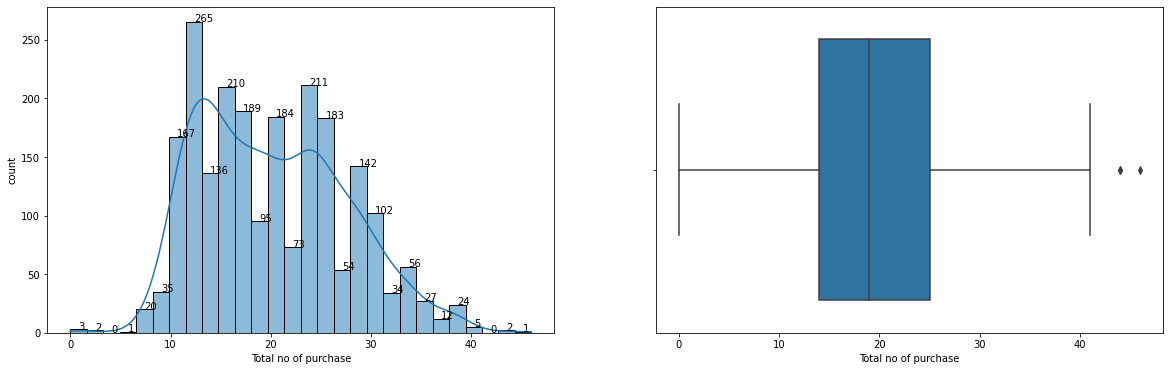

In [505]:
# Used for outlier removing, transformation and data distribution
nums_cols=df.select_dtypes(include=np.number).columns.tolist()
for col in nums_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (20, 6))
    
    plt.subplot(1, 2, 1)
    ax=sns.histplot(df[col],kde=True)
    # plt.text(x=df[col],y=df[col].count(),s=df[col].count())
    for p in ax.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
        s = height) # data label, formatted to ignore decimals
        # ha = center) # sets horizontal alignment (ha) to center
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()


In [506]:
df2=df[df["Year_Birth"]<=90]
df2=df2[(df2["Income"]<=120000 )]
df2=df2[df2["Total no of purchase"]<=40]
df2=df2[df2["Total Spend"]<=2500]


EDA Bivariate Analysis

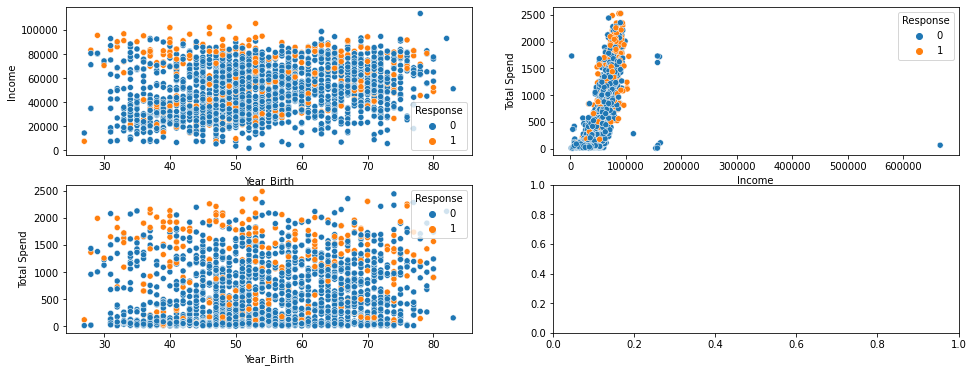

In [507]:
## Income spending by age
# Income for most of the population is under 100k
# Most of the people in the dataset aged between 45-65 
# # Income spending by age
fig,ax = plt.subplots(2,2,figsize=(16,6))
sns.scatterplot(x='Income',y='Total Spend',data=df,hue='Response',ax=ax[0][1])
sns.scatterplot(x='Year_Birth',y='Income',data=df2, hue='Response',ax=ax[0][0])
sns.scatterplot(x='Year_Birth',y='Total Spend',data=df2, hue='Response',ax=ax[1][0])
plt.show()

### Handling categorical features

In [508]:
df2.Marital_Status.value_counts()

Married     859
Together    572
Single      477
Divorced    230
Widow        77
Name: Marital_Status, dtype: int64

In [509]:
df2.Education.value_counts()

Graduation    1119
PhD            477
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [510]:
print(df2.shape)
df2 = pd.get_dummies(df2)
print(df2.shape)

(2215, 19)
(2215, 27)


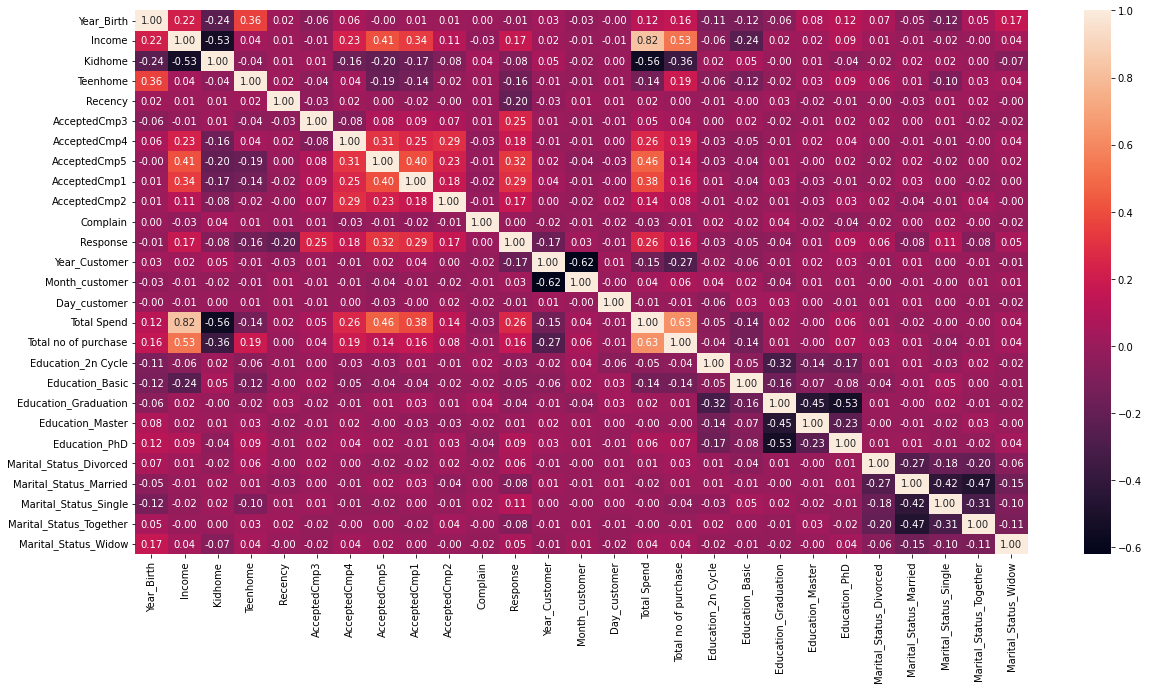

In [511]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(20, 10)) 
sns.heatmap(df2.corr(),annot=True,fmt='.2f')
plt.show()

- Total spend highly co-related with income
- complain 0 co-relation value with output variable(Response)

In [512]:
df2.drop(["Total Spend","Complain"],axis=1,inplace=True)

In [513]:
# lets check the highest correlation with target variable
#delete complain column it is not related to any column

df2.corr()['Response'].sort_values(ascending=False)

Response                   1.000000
AcceptedCmp5               0.323989
AcceptedCmp1               0.292186
AcceptedCmp3               0.250472
AcceptedCmp4               0.179429
Income                     0.171475
AcceptedCmp2               0.171083
Total no of purchase       0.162802
Marital_Status_Single      0.106264
Education_PhD              0.087711
Marital_Status_Divorced    0.058091
Marital_Status_Widow       0.052721
Month_customer             0.029534
Education_Master           0.006682
Day_customer              -0.012297
Year_Birth                -0.013443
Education_2n Cycle        -0.033778
Education_Graduation      -0.042464
Education_Basic           -0.049422
Marital_Status_Married    -0.076179
Marital_Status_Together   -0.077551
Kidhome                   -0.077866
Teenhome                  -0.157331
Year_Customer             -0.170746
Recency                   -0.199251
Name: Response, dtype: float64

### Features selection

In [514]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE,mutual_info_classif,f_classif,SelectKBest

#### RFE

In [515]:
X = df2[df2.columns.difference(['y'])]
classifier = RandomForestClassifier()
rfe = RFE(classifier, n_features_to_select=10)
rfe = rfe.fit(X, df2['Response'] )
rfe.support_
imp_vars_RFE = list(X.columns[rfe.support_])
imp_vars_RFE

['AcceptedCmp1',
 'AcceptedCmp3',
 'AcceptedCmp5',
 'Day_customer',
 'Income',
 'Recency',
 'Response',
 'Total no of purchase',
 'Year_Birth',
 'Year_Customer']

#### Select KBEST

In [516]:
X = df2[df2.columns.difference(['y'])]
SKB = SelectKBest(f_classif, k=10).fit(X, df2[['Response']] )
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])
imp_vars_SKB

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Income',
 'Recency',
 'Response',
 'Total no of purchase',
 'Year_Customer']

#### Mutual info

In [517]:
from sklearn.feature_selection import mutual_info_classif
X = df2[df2.columns.difference(['Response'])]
MIC = SelectKBest(mutual_info_classif, k=10).fit(X, df2[['Response']] )
SKB.get_support()
imp_vars_MIC = list(X.columns[MIC.get_support()])
imp_vars_MIC

['AcceptedCmp1',
 'AcceptedCmp3',
 'AcceptedCmp5',
 'Day_customer',
 'Education_PhD',
 'Income',
 'Marital_Status_Single',
 'Recency',
 'Total no of purchase',
 'Year_Customer']

In [518]:
Final_list_cols = list(set(imp_vars_SKB + imp_vars_MIC + imp_vars_RFE ))
print(len(Final_list_cols))
y='Response'
if(y not in Final_list_cols):
    Final_list_cols.append('Response')


14


In [519]:
trainDataset=df2[Final_list_cols]
trainDataset.head()

,AcceptedCmp1,Year_Customer,Education_PhD,Year_Birth,AcceptedCmp5,Response,Recency,Day_customer,Marital_Status_Single,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,Total no of purchase,Income
0,0,2012,0,66,0,1,58,4,1,0,0,0,32,58138.0
1,0,2014,0,69,0,0,38,8,1,0,0,0,11,46344.0
2,0,2013,0,58,0,0,26,21,0,0,0,0,25,71613.0
3,0,2014,0,39,0,0,26,10,0,0,0,0,14,26646.0
4,0,2014,1,42,0,0,94,19,0,0,0,0,24,58293.0


#### Transformation and Scaling

In [520]:
def scaling_implementation(x):
    from sklearn.preprocessing import StandardScaler
    scaling=StandardScaler()
 
    # Use fit and transform method
    Scaled_data=scaling.fit_transform(x)
    return Scaled_data

### Splitting the data into train & test 

In [521]:
target=trainDataset["Response"]
inputData=trainDataset.drop('Response',axis=1)
inputDataset=scaling_implementation(inputData)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(inputDataset,target, test_size=0.3, random_state=42)

Model

In [522]:
#import requied library from sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#import support vector classifier with rbf kernal
from sklearn.svm import SVC
svcrbf=SVC(kernel='rbf',class_weight='balanced')

#import support vector classifier with linear kernal
svclinear=SVC(kernel='linear',class_weight='balanced')

#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()

#import LogisticRegression 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier()


Output model

In [524]:
cols=inputData.columns
def model_output(ml,xtrain,ytrain,xtest,ytest):
    for i in ml:
        print(i," Model")
        model_fit=i.fit(xtrain,ytrain)
        # print('Train score',model_fit.score(xtrain,ytrain))
        train_predict=model_fit.predict(xtrain)
        ml_output=model_fit.predict(xtest)
        # print("testing Accuracy= ",accuracy_score(ytest,ml_output)*100)
        cm = confusion_matrix(ytest,ml_output)
        color = 'white'
        matrix = plot_confusion_matrix(model_fit, xtest, ytest, cmap=plt.cm.Blues)
        matrix.ax_.set_title('Confusion Matrix', color=color)
        plt.xlabel('Predicted Label', color=color)
        plt.ylabel('True Label', color=color)
        plt.gcf().axes[0].tick_params(colors=color)
        plt.gcf().axes[1].tick_params(colors=color)
        plt.show()
        print()
        print("Training Accuracy Report:")
        print(metrics.classification_report(ytrain, train_predict))
        print("Testing Accuracy Report:")
        print(metrics.classification_report(ytest, ml_output))
        print()
        # Performing logistic Regression using K-Fold validation manually
        from sklearn.model_selection import cross_val_score, KFold
        kfold = KFold(n_splits=10, random_state=7,shuffle=True)
        scoring = 'accuracy'
        results = cross_val_score(i, xtrain, ytrain, cv=kfold, scoring=scoring)
        print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
        print()
        print("--------------------------------------------------------------------")
        


SVC(class_weight='balanced')  Model


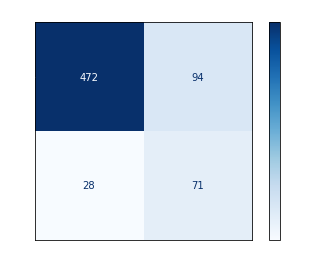


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1321
           1       0.49      0.86      0.63       229

    accuracy                           0.85      1550
   macro avg       0.73      0.85      0.77      1550
weighted avg       0.90      0.85      0.86      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.89       566
           1       0.43      0.72      0.54        99

    accuracy                           0.82       665
   macro avg       0.69      0.78      0.71       665
weighted avg       0.87      0.82      0.83       665


10-fold cross validation average accuracy: 0.797

--------------------------------------------------------------------
SVC(class_weight='balanced', kernel='linear')  Model


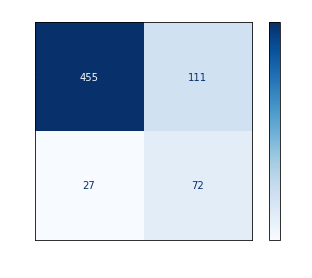


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1321
           1       0.39      0.75      0.51       229

    accuracy                           0.79      1550
   macro avg       0.67      0.77      0.69      1550
weighted avg       0.87      0.79      0.81      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       566
           1       0.39      0.73      0.51        99

    accuracy                           0.79       665
   macro avg       0.67      0.77      0.69       665
weighted avg       0.86      0.79      0.82       665


10-fold cross validation average accuracy: 0.783

--------------------------------------------------------------------
DecisionTreeClassifier()  Model


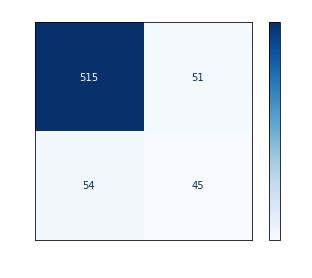


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1321
           1       1.00      0.96      0.98       229

    accuracy                           0.99      1550
   macro avg       1.00      0.98      0.99      1550
weighted avg       0.99      0.99      0.99      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       566
           1       0.47      0.45      0.46        99

    accuracy                           0.84       665
   macro avg       0.69      0.68      0.68       665
weighted avg       0.84      0.84      0.84       665


10-fold cross validation average accuracy: 0.816

--------------------------------------------------------------------
LogisticRegression()  Model


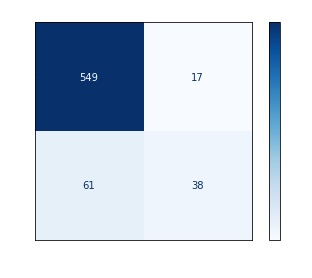


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1321
           1       0.71      0.35      0.47       229

    accuracy                           0.88      1550
   macro avg       0.80      0.66      0.70      1550
weighted avg       0.87      0.88      0.87      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       566
           1       0.69      0.38      0.49        99

    accuracy                           0.88       665
   macro avg       0.80      0.68      0.71       665
weighted avg       0.87      0.88      0.87       665


10-fold cross validation average accuracy: 0.878

--------------------------------------------------------------------
RandomForestClassifier()  Model


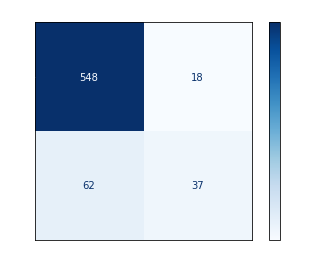


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1321
           1       1.00      0.96      0.98       229

    accuracy                           0.99      1550
   macro avg       1.00      0.98      0.99      1550
weighted avg       0.99      0.99      0.99      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       566
           1       0.67      0.37      0.48        99

    accuracy                           0.88       665
   macro avg       0.79      0.67      0.71       665
weighted avg       0.86      0.88      0.86       665


10-fold cross validation average accuracy: 0.881

--------------------------------------------------------------------


In [525]:
ml=[svcrbf,svclinear,decision,logistic,random]
model_output(ml,xtrain,ytrain,xtest,ytest)

Overall SVC(linear) has best recall 75% of possitive and overall accuracy 80% 

## Hyper parameter tunning

In [526]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Logistic regression

In [527]:
parameter_logistic={'penalty':['l1', 'l2', 'elasticnet','None'],
'C':[0.01,0.1,1,5,10,50],
'solver':['lbfgs','liblinear','newton-cg','newton-cholesky'],
'multi_class':['auto','ovr'],
'verbose':[0.1,0,1,2,5,7,9]   
}

gscv_logistic = GridSearchCV(estimator=LogisticRegression(), 
                        param_grid=parameter_logistic, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hyperlogistic=gscv_logistic.fit(xtrain,ytrain)
gridlogistic=hyperlogistic.best_estimator_
gridlogistic

Fitting 5 folds for each of 1344 candidates, totalling 6720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.1, verbose=0.1)

### Decision tree

In [528]:
parameter_decision={'criterion':['gini','entropy','log_loss'],
'max_depth':[2,3,4,5,6,7,8],
'max_features':['auto','sqrt','log2','None']  
}

gscv_decision = GridSearchCV(estimator=DecisionTreeClassifier(), 
                        param_grid=parameter_decision, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hyperdecision=gscv_decision.fit(xtrain,ytrain)
Griddecision=hyperdecision.best_estimator_
Griddecision

Fitting 5 folds for each of 84 candidates, totalling 420 fits


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt')

### Random forest

In [529]:
parameter_random={'n_estimators':[70,100,200,400,600,800],
'criterion':['gini','entropy','log_loss'],
'max_depth':['None',3,5,7,8,10],
'max_features':['sqrt','log2']
}

gscv_random = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=parameter_random, 
                        cv=3,
                        verbose=True, n_jobs=-1)

hyperrandom=gscv_random.fit(xtrain,ytrain)
Gridrandom=hyperrandom.best_estimator_
Gridrandom

Fitting 3 folds for each of 216 candidates, totalling 648 fits


RandomForestClassifier(max_depth=10, n_estimators=800)

### SVC kernel- rbf

In [530]:
parameter_svcrbf={'C': [0.1,1,5,10,50,100], 
              'gamma': ['scale',1,0.1,0.01, 0.001,0.005, 0.0001],
              'kernel': ['rbf'],
              'class_weight':['balanced','None']}
gscv_svcrbf = GridSearchCV(estimator=SVC(), 
                        param_grid=parameter_svcrbf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

hypersvcrbf=gscv_svcrbf.fit(xtrain,ytrain)
Gridsvcrbf=hypersvcrbf.best_estimator_
Gridsvcrbf

Fitting 5 folds for each of 84 candidates, totalling 420 fits


SVC(C=0.1, class_weight='balanced', gamma=0.001)

### SVC kernel- linear

In [531]:
parameter_svclinear={'C': [0.1,1,5,10,50], 
              'gamma': ['scale',1, 0.1, 0.01, 0.001,0.005, 0.0001],
              'kernel': ['linear'],
              'class_weight':['balanced','None']}
gscv_svclinear = GridSearchCV(estimator=SVC(), 
                        param_grid=parameter_svclinear, 
                        cv=4,
                        verbose=True, n_jobs=-1)

hypersvclinear=gscv_svclinear.fit(xtrain,ytrain)
Gridsvclinear=hypersvclinear.best_estimator_
Gridsvclinear

Fitting 4 folds for each of 70 candidates, totalling 280 fits


SVC(C=5, class_weight='balanced', kernel='linear')

LogisticRegression(C=0.1, verbose=0.1)  Model


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


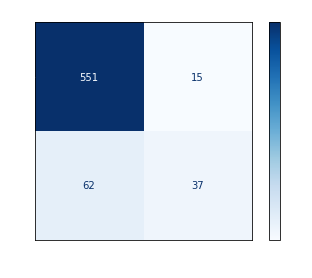


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1321
           1       0.73      0.34      0.47       229

    accuracy                           0.88      1550
   macro avg       0.81      0.66      0.70      1550
weighted avg       0.87      0.88      0.87      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       566
           1       0.71      0.37      0.49        99

    accuracy                           0.88       665
   macro avg       0.81      0.67      0.71       665
weighted avg       0.87      0.88      0.87       665


10-fold cross validation average accuracy: 0.881

--------------------------------------------------------------------
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt')  Model


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

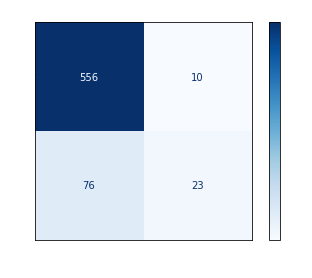


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1321
           1       0.72      0.22      0.34       229

    accuracy                           0.87      1550
   macro avg       0.80      0.60      0.63      1550
weighted avg       0.86      0.87      0.84      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       566
           1       0.70      0.23      0.35        99

    accuracy                           0.87       665
   macro avg       0.79      0.61      0.64       665
weighted avg       0.85      0.87      0.84       665


10-fold cross validation average accuracy: 0.857

--------------------------------------------------------------------
RandomForestClassifier(max_depth=10, n_estimators=800)  Model


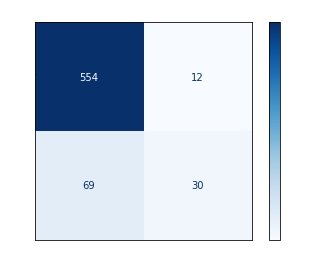


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1321
           1       1.00      0.65      0.79       229

    accuracy                           0.95      1550
   macro avg       0.97      0.82      0.88      1550
weighted avg       0.95      0.95      0.94      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       566
           1       0.71      0.30      0.43        99

    accuracy                           0.88       665
   macro avg       0.80      0.64      0.68       665
weighted avg       0.86      0.88      0.86       665


10-fold cross validation average accuracy: 0.879

--------------------------------------------------------------------
SVC(C=0.1, class_weight='balanced', gamma=0.001)  Model


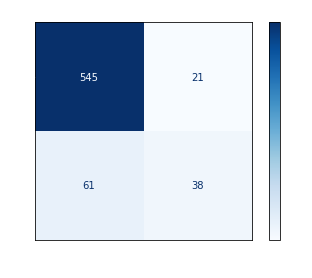


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1321
           1       0.64      0.33      0.43       229

    accuracy                           0.87      1550
   macro avg       0.77      0.65      0.68      1550
weighted avg       0.86      0.87      0.86      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       566
           1       0.64      0.38      0.48        99

    accuracy                           0.88       665
   macro avg       0.77      0.67      0.71       665
weighted avg       0.86      0.88      0.86       665


10-fold cross validation average accuracy: 0.870

--------------------------------------------------------------------
SVC(C=5, class_weight='balanced', kernel='linear')  Model


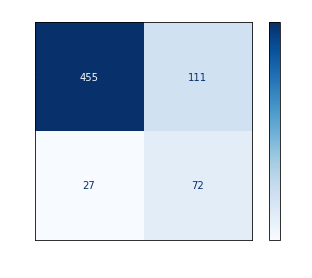


Training Accuracy Report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1321
           1       0.39      0.76      0.51       229

    accuracy                           0.79      1550
   macro avg       0.67      0.78      0.69      1550
weighted avg       0.87      0.79      0.81      1550

Testing Accuracy Report:
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       566
           1       0.39      0.73      0.51        99

    accuracy                           0.79       665
   macro avg       0.67      0.77      0.69       665
weighted avg       0.86      0.79      0.82       665


10-fold cross validation average accuracy: 0.782

--------------------------------------------------------------------


In [532]:
ml1=[gridlogistic,Griddecision,Gridrandom,Gridsvcrbf,Gridsvclinear]
model_output(ml1,xtrain,ytrain,xtest,ytest)

### Features importance

Coefficient magnitude: In linear classification, the coefficients of the model represent 
the contribution of each feature to the decision boundary. The magnitude of each coefficient reflects 
the importance of the corresponding feature, with larger magnitude indicating a stronger impact on the decision boundary.

Correlation with the target variable: The correlation between each feature and 
the target variable can also be used as a measure of feature importance. 
Features that are highly correlated with the target variable are more likely to be important for classification.

In [549]:
def features(featuresList,xtrain,ytrain,xtest,ytest,cols):
    from sklearn.inspection import permutation_importance
    for i in featuresList:
        print(i)
        if(i in [decision,random]): 
            importance1 = i.feature_importances_
            # summarize feature importance
            for a in range(len(cols)):
                print(cols[a]," : ",importance1[a])
        if(i in [logistic,svclinear]):
            importance2 = i.coef_[0]
            # summarize feature importance
            for a in range(len(cols)):
                print(cols[a]," : ",importance2[a])
        if(i in [svcrbf]):
            # perform permutation importance
            results = permutation_importance(i, xtrain, ytrain, scoring='accuracy')
            # get importance
            importance = results.importances_mean
            # importance=np.sort(importance)
            # summarize feature importance
            for a in range(len(importance)):
                print(cols[a], " : ", importance[a])
        print("---------------------------------------------")
        print()

 

In [550]:
featuresList=[svcrbf,svclinear,decision,logistic,random]
features(featuresList,xtrain,ytrain,xtest,ytest,cols)

SVC(class_weight='balanced')
AcceptedCmp1  :  0.02141935483870965
Year_Customer  :  0.03096774193548384
Education_PhD  :  0.025419354838709652
Year_Birth  :  0.0153548387096774
AcceptedCmp5  :  0.029935483870967717
Recency  :  0.04270967741935483
Day_customer  :  0.016645161290322518
Marital_Status_Single  :  0.020516129032258034
AcceptedCmp2  :  0.013419354838709619
AcceptedCmp3  :  0.026838709677419303
AcceptedCmp4  :  0.011612903225806437
Total no of purchase  :  0.04141935483870964
Income  :  0.04206451612903224
---------------------------------------------

SVC(class_weight='balanced', kernel='linear')
AcceptedCmp1  :  0.295498565265353
Year_Customer  :  -0.6689453993344472
Education_PhD  :  0.32051216880417854
Year_Birth  :  0.01763986775097237
AcceptedCmp5  :  0.2884399102776598
Recency  :  -0.6140190606853366
Day_customer  :  0.040936780224095415
Marital_Status_Single  :  0.39719469314268885
AcceptedCmp2  :  0.1766267659658176
AcceptedCmp3  :  0.4805177012096198
AcceptedCmp4  :